In [ ]:
!git clone https://github.com/saisriteja/sample_paleru.git

fatal: destination path 'sample_paleru' already exists and is not an empty directory.


In [ ]:
%tensorflow_version 1.x
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,Bidirectional,LSTM,Reshape,CuDNNLSTM,BatchNormalization,Flatten,Dropout,Dense
from keras.layers import add
from keras.utils import plot_model
from keras import regularizers

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
def resnet_model(optimizer = 'adam'):
    input  = Input(shape = (256,256*4,1))

    c1 = Conv2D(64, (7,7), padding='same',strides=2,activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1 = 0.02, l2 = 0.02))(input)
    b1 = BatchNormalization()(c1)

    c2 = conv1 = Conv2D(32, (3,3),strides=2, padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(input)
    b2 = BatchNormalization()(c2)
    a2 = Activation('relu')(b2)

    c3 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a2)
    a3 = Activation('relu')(c3)

    c4 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a3)
    b4 = BatchNormalization()(c4)

    m1  = add([a1, b4])
    a4 = Activation('relu')(m1)


    #-----------------------------------------------layer 2----------------------------------------------------------------------------

    c1 = Conv2D(128, (3,3),strides=2, padding='same',activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a4)
    b1 = BatchNormalization()(c1)

    c2 = conv1 = Conv2D(64, (3,3),strides=2, padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a4)
    b2 = BatchNormalization()(c2)
    a2 = Activation('relu')(b2)

    c3 = conv1 = Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a2)
    a3 = Activation('relu')(c3)


    c4 = conv1 = Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a3)
    b4 = BatchNormalization()(c4)

    m1  = add([c1, b4])
    a4 = Activation('relu')(m1)

    #----------------------------------------------layer 3------------------------------------------------------------------------------

    c1 = Conv2D(128, (3,3),strides = (1,2) ,padding='same',activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a4)
    b1 = BatchNormalization()(c1)

    c2 = conv1 = Conv2D(128, (3,3),strides = (1,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a4)
    b2 = BatchNormalization()(c2)
    a2 = Activation('relu')(b2)

    c3 = conv1 = Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a2)
    a3 = Activation('relu')(c3)


    c4 = conv1 = Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a3)
    b4 = BatchNormalization()(c4)

    m1  = add([c1, b4])
    a4 = Activation('relu')(m1)

    #-------------------------------------------layer 4---------------------------------------------------------------------------------

    c1 = Conv2D(64, (3,3),strides = (2,2) ,padding='same',activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a4)
    b1 = BatchNormalization()(c1)

    c2 = conv1 = Conv2D(128, (3,3),strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a4)
    b2 = BatchNormalization()(c2)
    a2 = Activation('relu')(b2)

    c3 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a2)
    a3 = Activation('relu')(c3)


    c4 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a3)
    b4 = BatchNormalization()(c4)

    m1  = add([c1, b4])
    a4 = Activation('relu')(m1)

    #-------------------------------------------layer 5-----------------------------------------------------------------------------------
    c1 = Conv2D(32, (3,3),strides = (2,2) ,padding='same',activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a4)
    b1 = BatchNormalization()(c1)

    c2 = conv1 = Conv2D(64, (3,3),strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a4)
    b2 = BatchNormalization()(c2)
    a2 = Activation('relu')(b2)

    c3 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a2)
    a3 = Activation('relu')(c3)


    c4 = conv1 = Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a3)
    b4 = BatchNormalization()(c4)

    m1  = add([c1, b4])
    a4 = Activation('relu')(m1)

    #-----------------------------------------layer 6-------------------------------------------------------------------------
    c1 = Conv2D(16, (3,3),strides = (2,2) ,padding='same',activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a4)
    b1 = BatchNormalization()(c1)

    c2 = conv1 = Conv2D(32, (3,3),strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a4)
    b2 = BatchNormalization()(c2)
    a2 = Activation('relu')(b2)

    c3 = conv1 = Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a2)
    a3 = Activation('relu')(c3)


    c4 = conv1 = Conv2D(16, (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.02,l2=0.02))(a3)
    b4 = BatchNormalization()(c4)

    m1  = add([c1, b4])
    a4 = Activation('relu')(m1)

    f = Flatten()(a4)
    f = Reshape((int(8192/4), 1))(f)

    # #-----------------------------------------layer7---------------------------------------------------------------------------
    bi1 = Bidirectional(CuDNNLSTM(512, return_sequences=True))(f)
    d1  = Dropout(0.2)(bi1)

    bi2 = Bidirectional(CuDNNLSTM(512))(d1)
    d2 = Dropout(0.4)(bi2)

    out = Dense(2,activation='softmax')(d2)

    # create model
    model = Model(inputs=input, outputs=out)
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
model = resnet_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


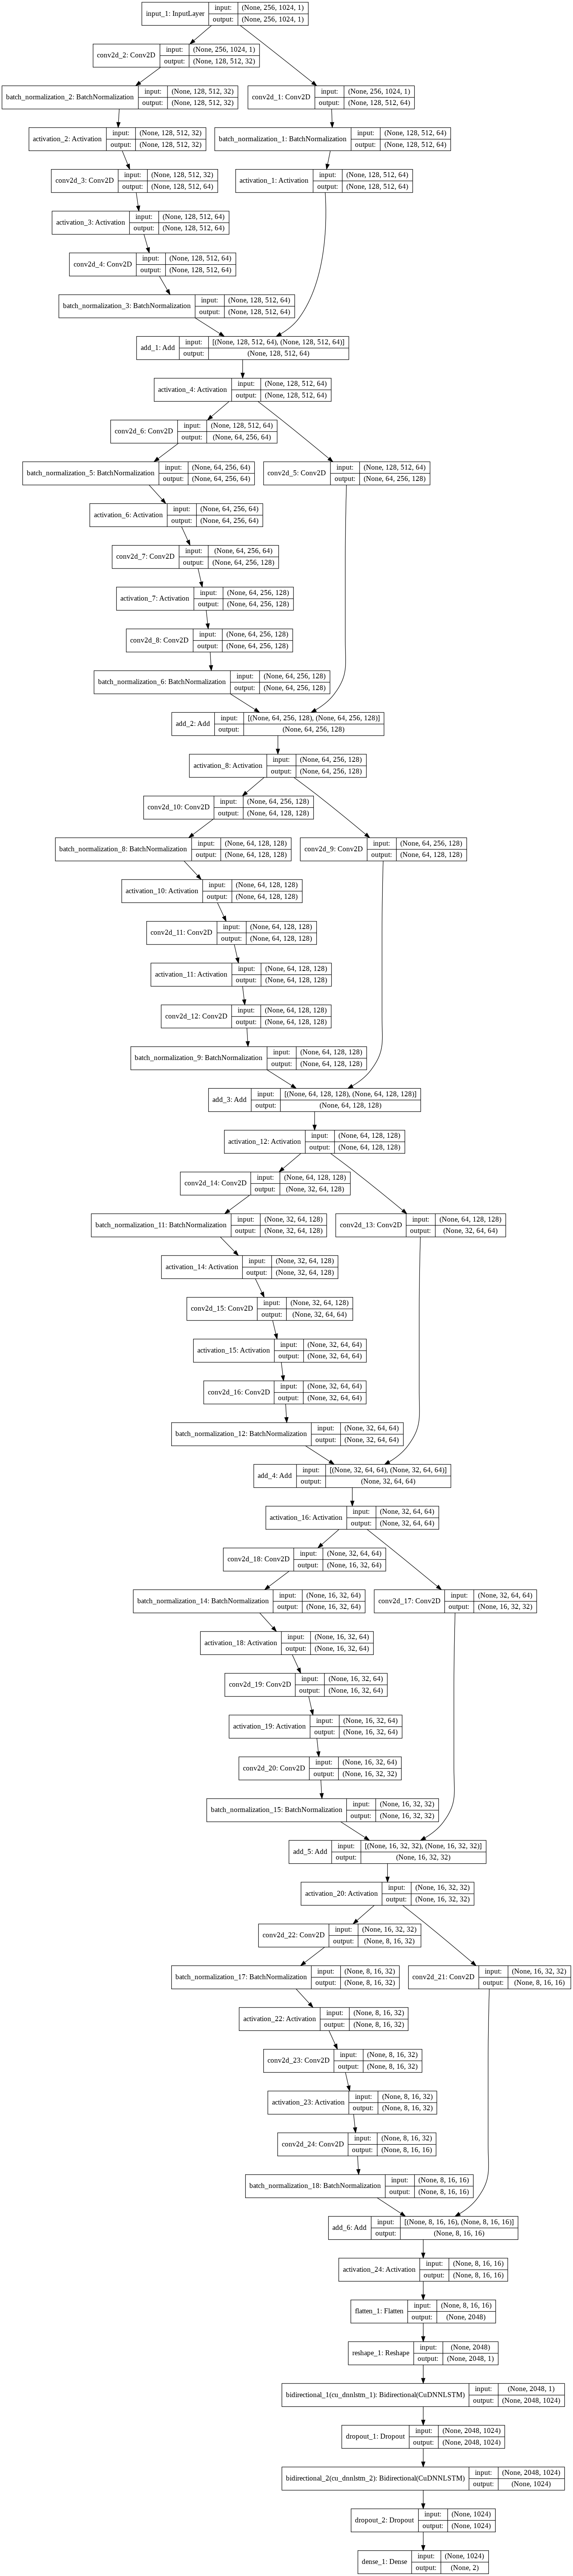

In [ ]:
plot_model(model, show_shapes=True, to_file='residual_module.png')

In [ ]:
!pip install librosa

In [ ]:
import os
try:
  os.mkdir('/content/sample_paleru/data')
  os.mkdir('/content/sample_paleru/data/filler')
  os.mkdir('/content/sample_paleru/data/nonfiller')
except:
  print("created")

created


In [ ]:
import os
import matplotlib
matplotlib.use('Agg') # No pictures displayed 
import pylab
import librosa
import librosa.display
import numpy as np

def make_data(f,cat):
    root_dir = '/content/sample_paleru/data/'+str(cat)+'/'
    path_file = '/content/sample_paleru/UCLASS/'+f
    sig, fs = librosa.load(path_file)   
    # print(path_file)
    # make pictures name 
    name = f.split('/')[-1].split('.wav')[0]
    # print(name)
    save_path = root_dir + f'{name}.jpg'

    pylab.axis('off') # no axis
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge

    S = librosa.feature.melspectrogram(y=sig, sr=fs)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    
    pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
    pylab.close()

In [ ]:
import pandas as pd
data = pd.read_excel('/content/sample_paleru/UCLASS.xlsx')
data = data.fillna(False)
data = data[data['Text'] != False]

names = data['Name'].to_list()
names = [n.split('\\')[-1] for n in names]
category = data['Interjection'].to_list()

In [ ]:
from tqdm import tqdm

In [ ]:
for i,j in tqdm(zip(names,category)):
    c = 'filler'
    if j == False:
        c = 'nonfiller'
    # print(c)
    make_data(i,c)

920it [06:16,  2.44it/s]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
# test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
path = '/content/sample_paleru/data'


train_generator = train_datagen.flow_from_directory(path,
                                                      target_size=(256,256*4),
                                                      batch_size=16,
                                                      class_mode="categorical",color_mode = 'grayscale',shuffle = True,subset='training')
validation_generator = train_datagen.flow_from_directory(path,
                                                      target_size=(256,256*4),
                                                      batch_size=16,
                                                      class_mode="categorical",color_mode = 'grayscale',shuffle = True,subset='validation')


Found 737 images belonging to 2 classes.
Found 183 images belonging to 2 classes.


In [ ]:
print(np.unique(train_generator.classes, return_counts=True))
print(np.unique(validation_generator.classes, return_counts=True))

(array([0, 1], dtype=int32), array([258, 479]))
(array([0, 1], dtype=int32), array([ 64, 119]))


In [ ]:
f = os.listdir('/content/sample_paleru/data/filler')
f[0]

'M_0098_10y6m_1_id57.jpg'

In [ ]:
import cv2
from glob import glob

data = []

for i in glob('/content/sample_paleru/data/filler/*.jpg'):
    img = cv2.imread(i,0)
    img = cv2.resize(img,(256*4,256))
    img = np.expand_dims(img, axis=-1)
    data.append([img,0])
for i in glob('/content/sample_paleru/data/nonfiller/*.jpg'):
    img = cv2.imread(i,0)
    img = cv2.resize(img,(256*4,256))
    img = np.expand_dims(img, axis=-1)
    data.append([img,1])

from random import shuffle
shuffle(data)

data = np.array(data)

In [ ]:
X = []
y = []
for img,label in data:
    X.append(img)
    y.append(label)

In [ ]:
X = np.array(X)/255.0
y = np.array(y)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=resnet_model, epochs=10, batch_size=8, verbose=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
optimizers = ['SGD', 'RMSprop', 'Adam', 'Adamax']
param_grid = dict(optimizer=optimizers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X,y)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_
print(best_accuracy)
print(best_parameters)


0.6499506831169128
{'optimizer': 'SGD'}


In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_generator.classes),
                                                 train_generator.classes,)

In [ ]:
from keras.metrics import categorical_accuracy

In [ ]:
from keras import optimizers
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = resnet_model()
model.compile(loss='categorical_crossentropy',optimizer=optimizers.adam(lr=1e-4),metrics=[categorical_accuracy])

In [ ]:
import keras.callbacks

In [ ]:
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=5, monitor="val_loss",verbose = 1),
    keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',verbose = 1,save_best_only=True),
    # keras.callbacks.TensorBoard(log_dir='./logs'),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.5,patience=1,cooldown = 1,verbose = 1)
]

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50,
                              # class_weight=class_weights,
                              callbacks = my_callbacks)

In [ ]:
model.load_weights('/content/model.06-0.56.h5')

In [ ]:
predictions = model.predict_generator(validation_generator)

In [ ]:
from sklearn import metrics
val_preds = np.argmax(predictions, axis=-1)
val_trues = validation_generator.classes
labels = validation_generator.class_indices.keys()
print(labels,val_trues,val_preds)
# precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(val_trues, val_preds, labels=labels)

In [ ]:
 import pandas as pd
data  = pd.read_excel('/content/sample_paleru/UCLASS.xlsx')

In [ ]:
data = data.fillna(False)
data = data[data['Text'] != False]

In [ ]:
name = data['Name'].to_list()
name = [n.split('\\')[-1].split('_id')[0] for n in name]
data['Name'] = name

In [ ]:
data.shape

In [ ]:
len(data['Name'].unique())

In [ ]:
from glob import glob
imgs = glob('/content/sample_paleru/spectrograms/validation/fillers/*.png')

In [ ]:
imgs[0]

In [ ]:
import cv2
import matplotlib.pyplot as plt
plt.imshow(cv2.imread('/content/sample_paleru/data/nonfiller/F_0101_10y4m_1_id144.jpg',1))

In [ ]:
cv2.imread(imgs[0],1).shape